Importing library

In [265]:
import pandas as pd
import numpy as np

Data Preprocessing


In [266]:
df=pd.read_csv('/content/gas_turbines.csv')

In [267]:
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [269]:
df.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [270]:
df.duplicated().sum()

0

In [271]:
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


**Data standardization**

In [272]:

x = df.drop('TEY', axis = 1)
y = df['TEY']
x.shape


(15039, 10)

In [273]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [274]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**NN Model**

In [275]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [283]:
# create model
model = Sequential()
model.add(Dense(120, input_dim=10,activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))

In [284]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [285]:
# Fit the model
history=model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
1053/1053 [==============================] - 3s 2ms/step - loss: 1261.3306 - mse: 1261.3306
Epoch 2/50
1053/1053 [==============================] - 2s 2ms/step - loss: 28.2851 - mse: 28.2851
Epoch 3/50
1053/1053 [==============================] - 2s 2ms/step - loss: 5.6732 - mse: 5.6732
Epoch 4/50
1053/1053 [==============================] - 2s 2ms/step - loss: 2.4140 - mse: 2.4140
Epoch 5/50
1053/1053 [==============================] - 2s 2ms/step - loss: 2.1838 - mse: 2.1838
Epoch 6/50
1053/1053 [==============================] - 2s 2ms/step - loss: 1.5844 - mse: 1.5844
Epoch 7/50
1053/1053 [==============================] - 2s 2ms/step - loss: 1.2448 - mse: 1.2448
Epoch 8/50
1053/1053 [==============================] - 2s 2ms/step - loss: 1.7546 - mse: 1.7546
Epoch 9/50
1053/1053 [==============================] - 2s 2ms/step - loss: 1.4909 - mse: 1.4909
Epoch 10/50
1053/1053 [==============================] - 2s 2ms/step - loss: 1.3810 - mse: 1.3810
Epoch 11/50
1053/1053

In [286]:
# evaluate the model
scores = model.evaluate(x_test,y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

141/141 [==============================] - 0s 2ms/step - loss: 0.8483 - mse: 0.8483
mse: 84.83%


In [287]:
y_pred=model.predict(x_test)

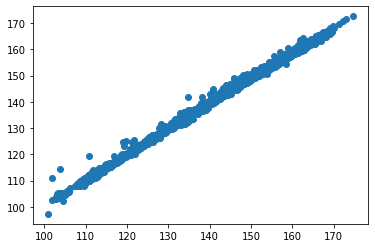

In [288]:
import  matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
            

In [289]:
predictions_df = pd.DataFrame()
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_pred
predictions_df['% Error'] = abs(predictions_df['Actual'] - predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop = True)

,Actual,Predicted,% Error
0,134.46,135.082458,0.462932
1,111.88,111.922539,0.038022
2,133.72,134.334869,0.459819
3,133.79,134.118332,0.245408
4,110.77,110.814827,0.040469
...,...,...,...
4507,134.08,136.098190,1.505214
4508,102.87,102.984200,0.111013
4509,155.96,154.979446,0.628721
4510,133.67,133.293716,0.281502
